In [6]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


from pandas_datareader import DataReader
from datetime import datetime

In [7]:
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

In [8]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day) 

In [9]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [10]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-07,126.320000,124.830002,126.169998,125.900002,71057600.0,125.184792
2021-06-08,128.460007,126.209999,126.599998,126.739998,74403800.0,126.020012
2021-06-09,127.750000,126.519997,127.209999,127.129997,56877900.0,126.407799
2021-06-10,128.190002,125.940002,127.019997,126.110001,71186400.0,125.393593
2021-06-11,127.440002,126.099998,126.529999,127.349998,53522400.0,126.626549


In [11]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,157.260040,153.686653,155.377795,155.577599,8.892486e+07,155.115272
std,13.767556,13.200598,13.559004,13.434846,2.667159e+07,13.532915
min,126.320000,124.830002,126.169998,125.900002,4.100000e+07,125.184792
25%,147.462505,144.697502,145.842499,146.102497,7.004048e+07,145.490173
50%,154.375000,150.270004,151.735001,151.945000,8.525175e+07,151.540413
75%,169.654995,165.384998,167.457497,166.524998,1.036128e+08,166.280693
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-06-07 to 2022-06-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


<AxesSubplot:xlabel='Date'>

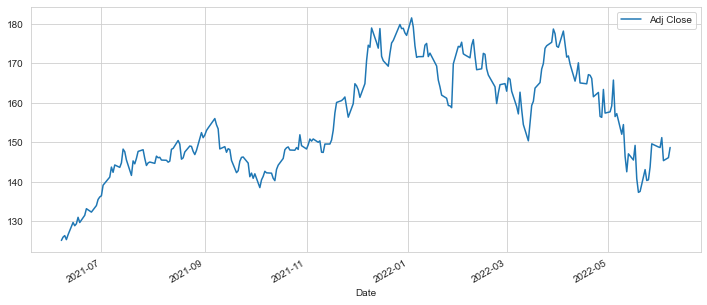

In [13]:
AAPL['Adj Close'].plot(legend=True,figsize=(12,5))

<AxesSubplot:xlabel='Date'>

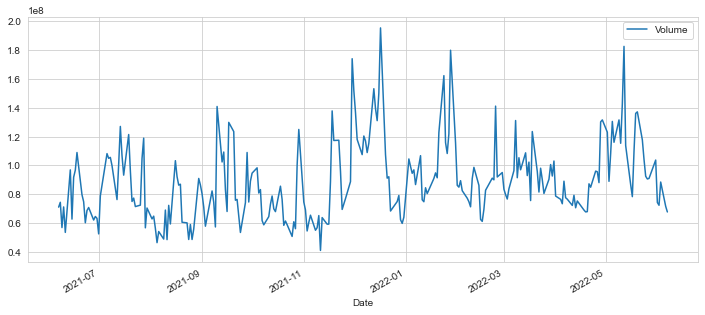

In [14]:
AAPL['Volume'].plot(legend=True,figsize=(12,5))

In [15]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [16]:
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2022-06-01,151.740005,147.679993,149.899994,148.710007,74286600.0,148.710007,143.072002,147.391822,159.780991
2022-06-02,151.270004,146.860001,147.830002,151.210007,72348100.0,151.210007,144.111002,146.663501,159.433745
2022-06-03,147.970001,144.460007,146.899994,145.380005,88471400.0,145.380005,144.914001,146.105501,158.942139
2022-06-06,148.570007,144.899994,147.029999,146.139999,71598400.0,146.139999,145.769002,145.548501,158.388647
2022-06-07,149.000000,144.100006,144.350006,148.710007,67713600.0,148.710007,146.329002,145.381001,157.873573


<AxesSubplot:xlabel='Date'>

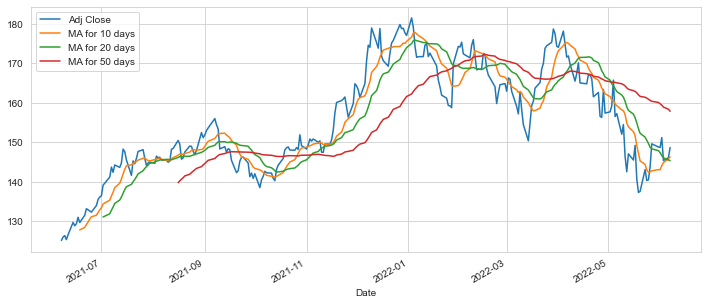

In [17]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

In [18]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [19]:
AAPL['Daily Return'].tail()


Date
2022-06-01   -0.000873
2022-06-02    0.016811
2022-06-03   -0.038556
2022-06-06    0.005228
2022-06-07    0.017586
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

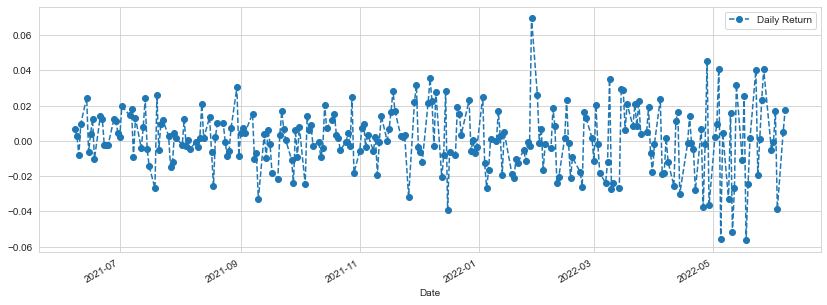

In [20]:
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')


<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

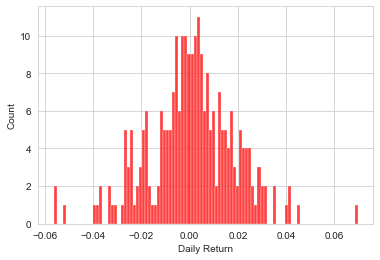

In [21]:
sns.histplot(x=AAPL['Daily Return'].dropna(),bins=100,color='red')


In [22]:
close_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [23]:
close_df.tail()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2022-06-01,148.710007,2277.840088,272.420013,121.683998
2022-06-02,151.210007,2352.449951,274.579987,125.511002
2022-06-03,145.380005,2290.820068,270.019989,122.349998
2022-06-06,146.139999,2336.409912,268.750000,124.790001
2022-06-07,148.710007,2342.989990,272.500000,123.000000


In [24]:
rets_df = close_df.pct_change()


In [25]:
rets_df.tail()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2022-06-01,-0.000873,0.001143,0.002023,0.012266
2022-06-02,0.016811,0.032755,0.007929,0.031450
2022-06-03,-0.038556,-0.026198,-0.016607,-0.025185
2022-06-06,0.005228,0.019901,-0.004703,0.019943
2022-06-07,0.017586,0.002816,0.013953,-0.014344


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


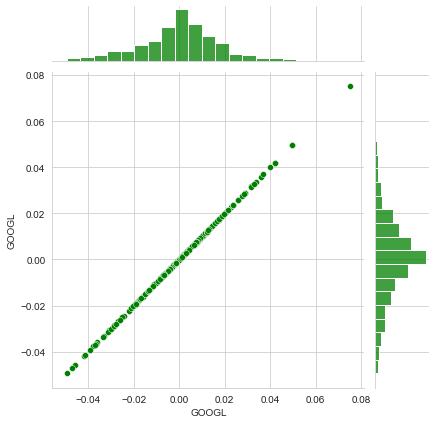

In [26]:
sns.jointplot('GOOGL','GOOGL',rets_df,kind='scatter',color='green')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


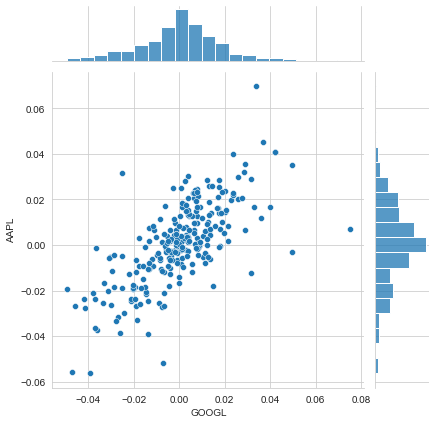

In [27]:
sns.jointplot('GOOGL','AAPL',rets_df,kind='scatter')

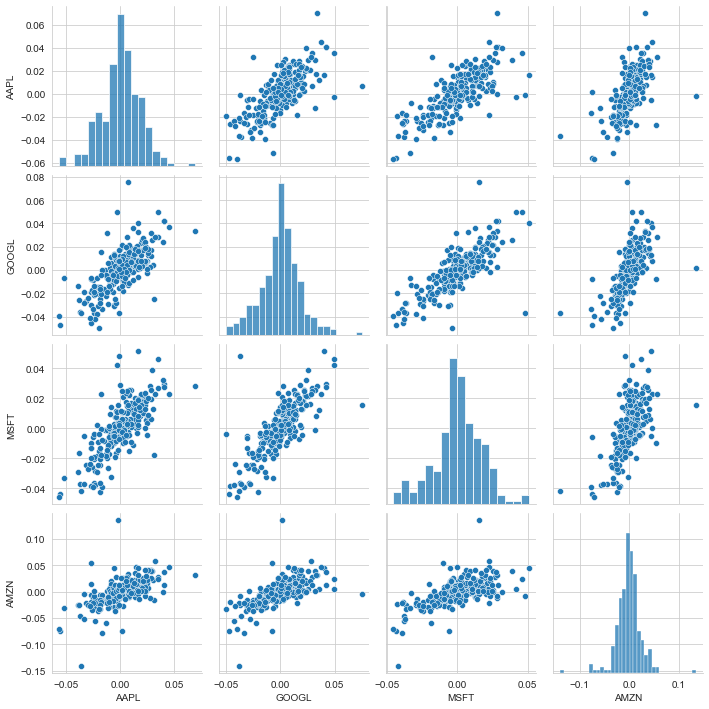

In [28]:
sns.pairplot(rets_df.dropna())

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

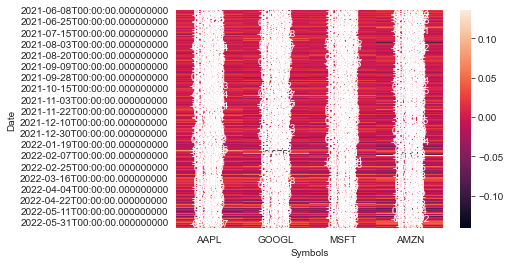

In [29]:
sns.heatmap(rets_df.dropna(),annot=True)

In [30]:
rets = rets_df.dropna()

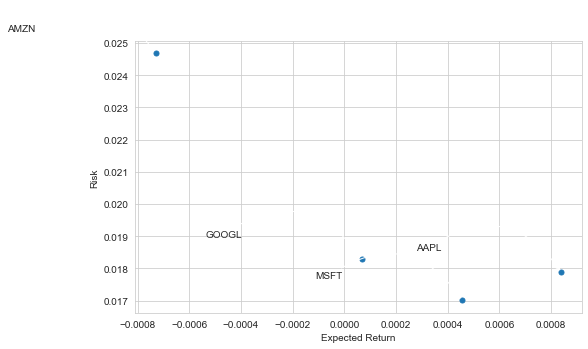

In [31]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))
    

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

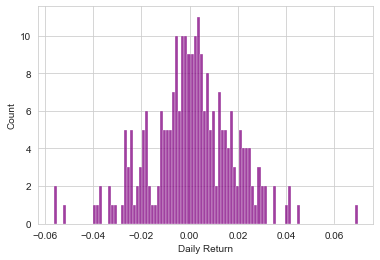

In [32]:
sns.histplot(x=AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [33]:
rets.head()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2021-06-08,0.006672,-0.001607,-0.004886,0.020669
2021-06-09,0.003077,0.003961,0.004039,0.005220
2021-06-10,-0.008023,0.011292,0.014393,0.020877
2021-06-11,0.009833,-0.002025,0.002527,-0.000842
2021-06-14,0.024578,0.007699,0.007755,0.011067


In [34]:
rets['AAPL'].quantile(0.05)

-0.027023126331778346

In [35]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['GOOGL']

sigma = rets.std()['GOOGL']

In [36]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [38]:
GOOGL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-07,2404.510010,2381.000000,2389.439941,2402.300049,1206000,2402.300049
2021-06-08,2419.520020,2394.780029,2412.010010,2398.439941,1212000,2398.439941
2021-06-09,2412.879883,2396.899902,2411.429932,2407.939941,897100,2407.939941
2021-06-10,2436.000000,2403.780029,2406.919922,2435.129883,1295200,2435.129883
2021-06-11,2441.719971,2418.959961,2440.000000,2430.199951,1097900,2430.199951


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

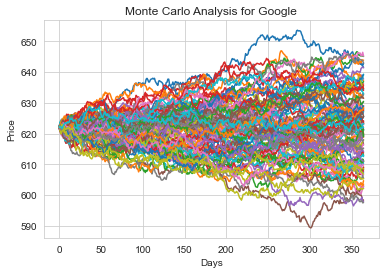

In [39]:
start_price = 622.049 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [40]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

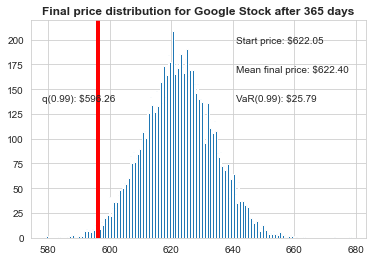

In [41]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')